## <center> <b>Computer Vision (CSE-6239)</b></center>
### <center> <b>Assignment</b></center>

 <div align="right">
  <b>Md. Omar Faruq <br>
  Roll: 1807557 </b>
</div> 

#### <b> Q1. Write a function that convolves an image with a given convolution filter</b>

<center>function [output_Image]= myImageFilter( Input_image, filter)<center/>

Your function should output image of the same size as that of input Image (use padding). Test your function (on attached images House1.jpg and House2.jpg) and show results on the following Kernels.

<ol type="i">
  <li>Averaging Kernel (3×3 and 5×5 )</li>
  <li>Gaussian Kernel (σ =1, 2, 3). Use (2σ +1)×(2σ +1) as size of Kernel (You may write a separate function to generate Gaussian Kernels for different values of σ.)</li>
  <li> Sobel Edge Operators.</li>
   <li>Prewitt Edge Operators. </li>
</ol>

<b>
1. Averaging Kernel (3×3 and 5×5 )
</b>

In [1]:
import numpy as np
import cv2
from skimage.io import imread
from skimage.color import rgb2gray
from scipy import ndimage
import matplotlib.pyplot as plt
from past.builtins import xrange
%matplotlib inline

In [2]:
# load image
house1_img = cv2.imread('House1.jpg')
house2_img = cv2.imread('House2.jpg')
# RGB to GRAY CONVERT
house1_img_gray = cv2.cvtColor(house1_img, cv2.COLOR_BGR2GRAY)
house2_img_gray = cv2.cvtColor(house2_img, cv2.COLOR_BGR2GRAY)

In [3]:
# 3×3 Average Kernel
kernel_1 = [[1 / 9, 1 / 9, 1 / 9],
            [1 / 9, 1 / 9, 1 / 9],
            [1 / 9, 1 / 9, 1 / 9]]

# 5×5 Average Kernel
kernel_2 = [[1 / 25, 1 / 25, 1 / 25, 1 / 25, 1 / 25 ],
            [1 / 25, 1 / 25, 1 / 25, 1 / 25, 1 / 25],
            [1 / 25, 1 / 25, 1 / 25, 1 / 25, 1 / 25], 
            [1 / 25, 1 / 25, 1 / 25, 1 / 25, 1 / 25],
            [1 / 25, 1 / 25, 1 / 25, 1 / 25, 1 / 25]]

##### <b>Convolution with padding <b/>

In [4]:
# Convolve function 
def convolve2d(image, kernel):
    kernel = np.flipud(np.fliplr(kernel))    # Flip the kernel
    output = np.zeros_like(image)            # convolution output
    
    # Add zero padding to the input image
    image_padded = np.zeros((image.shape[0] + 2, image.shape[1] + 2))   
    image_padded[1:-1, 1:-1] = image
    for x in range(image.shape[1]):     # Loop over every pixel of the image
        for y in range(image.shape[0]):
            # element-wise multiplication of the kernel and the image
            output[y,x]=(kernel*image_padded[y,x]).sum() 
    return output

In [5]:
# House1 Convolve
img_conv_House1 = convolve2d(house1_img_gray, kernel_1)
#cv2.imwrite('house_1.jpg', output) 
cv2.imshow('Convolve Image of House1', img_conv_House1)

# House2 Convolve
img_conv_House2 = convolve2d(house2_img_gray, kernel_2)
#cv2.imwrite('house_1.jpg', output) 
cv2.imshow('Convolve Image of House2', img_conv_House2)

# wait and quit
cv2.waitKey(0)
cv2.destroyAllWindows()

<b>Showing Convolve image of House1 and House2 with 3×3 and 5×5 average kernel respectively </b>

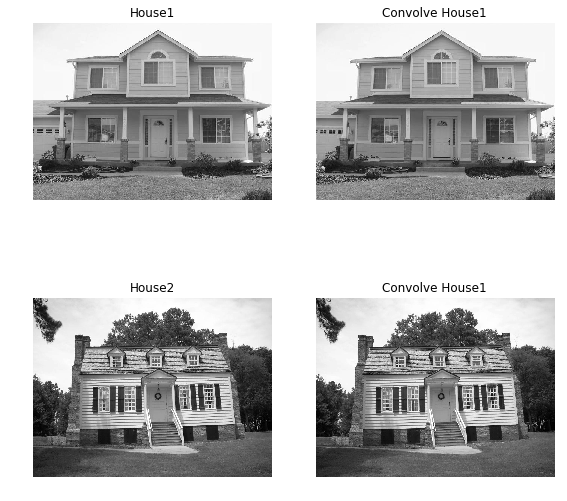

<Figure size 432x288 with 0 Axes>

In [35]:
fig, ax=plt.subplots(2, 2, figsize = (8,8))

ax[0,0].imshow(house1_img_gray, cmap = 'gray')
ax[0,0].set_title('House1')
ax[0,0].axis('off')

ax[0,1].imshow(img_conv_House1, cmap = 'gray')
ax[0,1].set_title('Convolve House1')
ax[0,1].axis('off')

ax[1,0].imshow(house2_img_gray, cmap = 'gray')
ax[1,0].set_title('House2')
ax[1,0].axis('off')

ax[1,1].imshow(img_conv_House2, cmap = 'gray')
ax[1,1].set_title('Convolve House1')
ax[1,1].axis('off')

plt.tight_layout()
plt.show()
#plt.savefig("Convolve_image.jpg")

<b>Convolve image with builtin function </b>

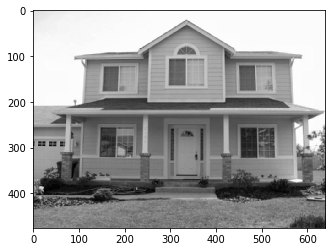

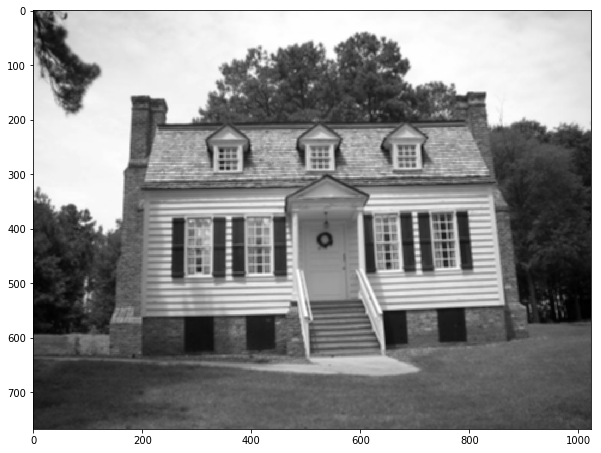

In [7]:
# Convolve House1 Image by 3×3 Average Kernel
conv_House1_BinM = ndimage.convolve(house1_img_gray, kernel_1)
plt.imshow(conv_House1_BinM, cmap = 'gray')
# Convolve House1 Image by 5×5 Average Kernel
conv_House2_BinM = ndimage.convolve(house2_img_gray, kernel_2)
plt.figure(figsize = (10,10))
plt.imshow(conv_House2_BinM, cmap = 'gray')

<b>
2. Gaussian Kernel (σ =1, 2, 3). Use (2σ +1)×(2σ +1) as size of Kernel (You may write a separate function to generate Gaussian Kernels for different values of σ.)
</b>

Gaussian blurring can be performed by
\begin{align}
I_\sigma & = I*G\sigma 
\end{align}
where * indicates convolution and $G\sigma$ is a Gaussian 2D-kernel with standard deviation defined as
\begin{align}
G_\sigma & = \frac{1}{(2\pi\sigma)}\exp^-\frac{x^2 + y^2}{2\sigma^2} 
\end{align}

<center><b> Gaussian Kernel 3×3, 5×5, 7×7 respectively</b></center>
<center> <img src="Gaussian-kernels-3x3-5x5-7x7.png" alt="Smiley face" height="500" width="500"> </center>
 <p align="right"><b>Source:</b> Shipitko, Oleg and Grigoryev, Anton. (2018). Gaussian filtering for FPGA based image processing with High-Level Synthesis tools. </p> 

In [8]:
# Gaussian Kernel with sigma1
def gaussian_filter_sigma1(shape =(3,3), sigma=1):
    x, y = [edge // 2 for edge in shape]
    grid = np.array([[((i**2+j**2)/(2.0*sigma**2)) for i in xrange(-x, x+1)] for j in xrange(-y, y+1)])
    g_filter = np.exp(-grid)/(2*np.pi*sigma**2)
    g_filter = g_filter / np.sum(g_filter)
    return g_filter

# Gaussian Kernel with sigma2
def gaussian_filter_sigma2(shape =(5,5), sigma=2):
    x, y = [edge // 2 for edge in shape]
    grid = np.array([[((i**2+j**2)/(2.0*sigma**2)) for i in xrange(-x, x+1)] for j in xrange(-y, y+1)])
    g_filter = np.exp(-grid)/(2*np.pi*sigma**2)
    g_filter = g_filter / np.sum(g_filter)
    return g_filter

# Gaussian Kernel with sigma3
def gaussian_filter_sigma3(shape =(7,7), sigma=3):
    x, y = [edge // 2 for edge in shape]
    grid = np.array([[((i**2+j**2)/(2.0*sigma**2)) for i in xrange(-x, x+1)] for j in xrange(-y, y+1)])
    g_filter = np.exp(-grid)/(2*np.pi*sigma**2)
    g_filter = g_filter / np.sum(g_filter)
    return g_filter

gaussian_kernel_sigma1 = gaussian_filter_sigma1()
#print (gaussian_kernel_sigma1)

gaussian_kernel_sigma2 = gaussian_filter_sigma2()
#print (gaussian_kernel_sigma2)

gaussian_kernel_sigma3 = gaussian_filter_sigma3()
#print (gaussian_kernel_sigma3)

<b>Convolve image Gaussian Kernel with Different Sigma (1, 2, 3) </b>

In [9]:
# Convolve House1 with Gaussian Kernel of Sigma 1 
gaussian_sigma1_House1 = ndimage.convolve(house1_img_gray, gaussian_kernel_sigma1)
cv2.imshow('Gaussian Image of House1 with sigma1', gaussian_sigma1_House1)

# Convolve House1 with Gaussian Kernel of Sigma 2 
gaussian_sigma2_House1 = ndimage.convolve(house1_img_gray, gaussian_kernel_sigma2)
cv2.imshow('Gaussian Image of House1 with sigma2', gaussian_sigma2_House1)

# Convolve House1 with Gaussian Kernel of Sigma 3 
gaussian_sigma3_House1 = ndimage.convolve(house1_img_gray, gaussian_kernel_sigma3)
cv2.imshow('Gaussian Image of House1 with sigma2', gaussian_sigma3_House1)

# wait and quit
cv2.waitKey(0)
cv2.destroyAllWindows()

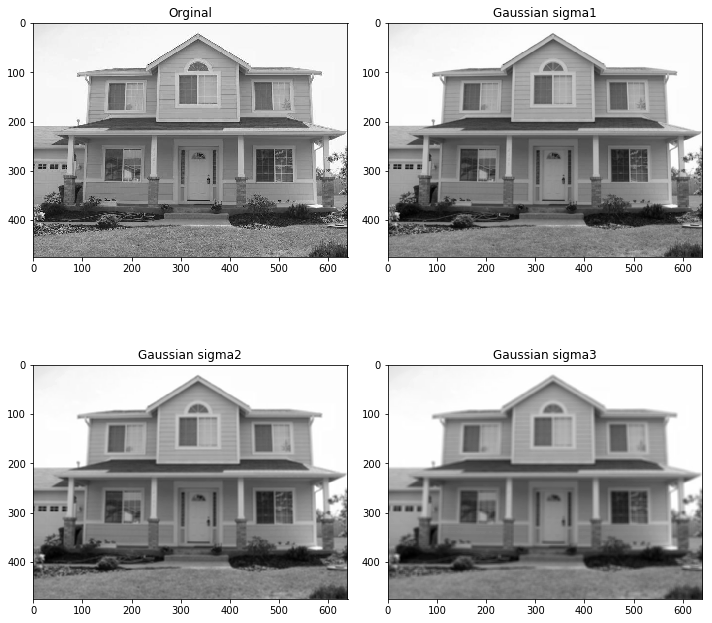

In [10]:
fig, ax=plt.subplots(2, 2, figsize = (10,10))

ax[0,0].imshow(house1_img_gray, cmap = 'gray')
ax[0,0].set_title('Orginal')

ax[0,1].imshow(gaussian_sigma1_House1, cmap = 'gray')
ax[0,1].set_title('Gaussian sigma1')

ax[1,0].imshow(gaussian_sigma2_House1, cmap = 'gray')
ax[1,0].set_title('Gaussian sigma2')

ax[1,1].imshow(gaussian_sigma3_House1, cmap = 'gray')
ax[1,1].set_title('Gaussian sigma3')

plt.tight_layout()
plt.show()
#plt.savefig("Gaussian_image.jpg")

<b>Gaussian Kernel used House1 image with builtin function </b>

In [11]:
from scipy.ndimage import gaussian_filter

# Sigma1 Gaussian
sigma1_gaussian = gaussian_filter(house1_img_gray, sigma=1)
cv2.imshow('Gaussian sigma1',sigma1_gaussian)

# Sigma2 Gaussian
sigma2_gaussian = gaussian_filter(house1_img_gray, sigma=2)
cv2.imshow('Gaussian sigma2',sigma2_gaussian)

# Sigma3 Gaussian
sigma3_gaussian = gaussian_filter(house1_img_gray, sigma=3)
cv2.imshow('Gaussian sigma3',sigma3_gaussian)


# wait and quit
cv2.waitKey(0)
cv2.destroyAllWindows()

<b>
3. Sobel Edge Operators 
</b>

<b>Sobel filter can be used to compute the image derivatives. So, it calculates the first derivatives of the image separately for the X and Y axes</b>
\begin{align}
I_x & = I*G_x \\
I_y & = I*G_y 
\end{align}
Where $G_x$ is horizontal and $G_y$ vertical filters
$$
G_x  = \begin{bmatrix}
-1 & 0 & 1 \\
-2 & 0 & 2 \\
-1 & 0 & 1 
\end{bmatrix}
\quad
G_y  = \begin{bmatrix}
-1 & -2 & -1 \\
0 & 0 & 0 \\
1 & 2 & 1 
\end{bmatrix}
$$


In [12]:
# Sobel X-filters
gx = [[-1, 0, 1],
      [-2, 0, 2],
      [-1, 0, 1 ]]

# Sobel Y-filters
gy = [[-1, -2, -1],
      [0, 0, 0],
      [1, 2, 1 ]]

# x-derivative
gardient_x = ndimage.convolve(house1_img_gray, gx)
#plt.imshow(x-derivative, cmap = 'gray')

# y-derivative 
gardient_y = ndimage.convolve(house1_img_gray, gy)
#plt.imshow(y-derivative, cmap = 'gray')

# Sobel Edge Operation 
def sobelOperator(img):
    container = np.copy(img)
    size = container.shape
    for i in range(1, size[0] - 1):
        for j in range(1, size[1] - 1):
            gx = (img[i - 1][j - 1] + 2*img[i][j - 1] + img[i + 1][j - 1]) - (img[i - 1][j + 1] + 2*img[i][j + 1] + img[i + 1][j + 1])
            gy = (img[i - 1][j - 1] + 2*img[i - 1][j] + img[i - 1][j + 1]) - (img[i + 1][j - 1] + 2*img[i + 1][j] + img[i + 1][j + 1])
            container[i][j] = min(255, np.sqrt(gx**2 + gy**2)) # Gradient Magnitude
    return container
  
sobel_gradient_magnitude = sobelOperator(house1_img_gray)
sobel_gradient_magnitude = cv2.cvtColor(sobel_gradient_magnitude, cv2.COLOR_GRAY2RGB)
#plt.imshow(sobel_gradient_magnitude)
#plt.show()

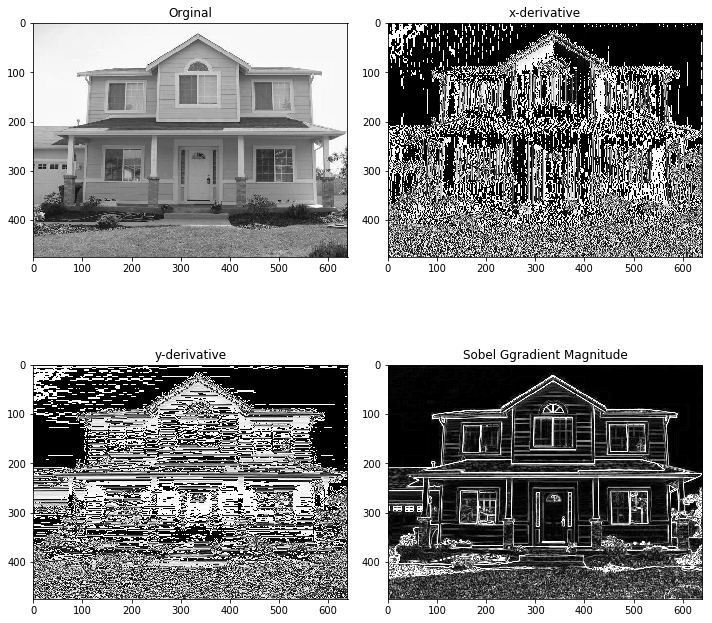

In [13]:
fig, ax=plt.subplots(2, 2, figsize = (10,10))

ax[0,0].imshow(house1_img_gray, cmap = 'gray')
ax[0,0].set_title('Orginal')

ax[0,1].imshow(gardient_x, cmap = 'gray')
ax[0,1].set_title('x-derivative')

ax[1,0].imshow(gardient_y, cmap = 'gray')
ax[1,0].set_title('y-derivative')

ax[1,1].imshow(sobel_gradient_magnitude, cmap = 'gray')
ax[1,1].set_title('Sobel Ggradient Magnitude')

plt.tight_layout()
#plt.title('Sobel Image derivatives')
plt.show()
#plt.savefig("sobel_gradient_magnitude.jpg")


<b>Sobel Image derivative with builtin function </b>

In [14]:
from skimage import filters
edges = filters.sobel(house1_img_gray)
#plt.figure(figsize = (12,12))
#plt.imshow(edges, cmap= 'gray')

<b>
4. Prewitt Edge Operators
</b>

Prewitt operator is similar to the Sobel operator and is used for detecting vertical and horizontal edges in images. 
Prewitt $D_x$ is horizontal and $D_y$ vertical filters are 
$$
D_x  = \begin{bmatrix}
-1 & 0 & 1 \\
-1 & 0 & 1 \\
-1 & 0 & 1 
\end{bmatrix}
\quad
D_y  = \begin{bmatrix}
-1 & -1 & -1 \\
0 & 0 & 0 \\
1 & 1 & 1 
\end{bmatrix}
$$

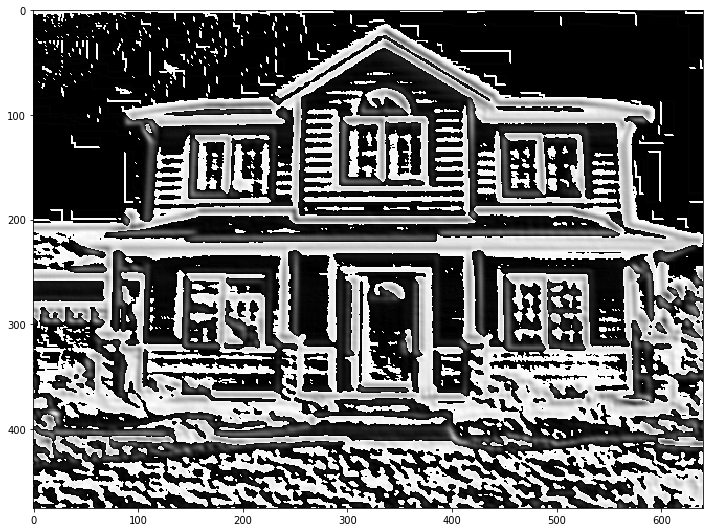

In [15]:
# Prewitt X-filters
dx = [[1, 1, 1],
      [0, 0, 0],
      [-1, -1, -1]]

# Prewitt Y-filters
dy = [[-1, 0, 1],
      [-1, 0, 1],
      [-1, 0, 1]]

# x-derivative
derivative_x = ndimage.convolve(sigma2_gaussian, dx)
#plt.imshow(derivative_x, cmap = 'gray')

# y-derivative 
derivative_y = ndimage.convolve(sigma2_gaussian, dy)
#plt.imshow(y-derivative, cmap = 'gray')

prewitt_Edge = derivative_x +  derivative_y
plt.figure(figsize = (12,12))
plt.imshow(prewitt_Edge, cmap = 'gray')
plt.show()


<b>Prewitt Image derivative with builtin function </b>

In [16]:
kernelx = np.array([[1,1,1],[0,0,0],[-1,-1,-1]])
kernely = np.array([[-1,0,1],[-1,0,1],[-1,0,1]])
img_prewittx = cv2.filter2D(house1_img_gray, -1, kernelx)
img_prewitty = cv2.filter2D(house1_img_gray, -1, kernely)
#cv2.imshow("Prewitt X", img_prewittx)
#cv2.imshow("Prewitt Y", img_prewitty)
cv2.imshow("Prewitt", img_prewittx + img_prewitty)
cv2.waitKey(0)
cv2.destroyAllWindows()

#### <b>Q2. Attached ‘Noisy image1’ and ‘Noisy image2’ are corrupted by salt and paper noise. Apply 5 by 5 Averaging and Median filter and show your outputs.</b>

In [17]:
# Load Noisy image1 and Noisy image2
noisy_img1_gray = imread('Noisyimage1.jpg')
noisy_image2 = cv2.imread('Noisyimage2.jpg') 

# RGB to GRAY CONVERT
#noisy_img1_gray = cv2.cvtColor(noisy_image1, cv2.COLOR_BGR2GRAY)
noisy_img2_gray = cv2.cvtColor(noisy_image2, cv2.COLOR_BGR2GRAY)

In [18]:
# Revome Salt and Paper Noise of Noisyimage1 by 5 * 5 average kernel 
sp_remove_noisyimage1 = ndimage.convolve(noisy_img1_gray, kernel_2)
cv2.imshow('Remove salt and paper noise', sp_remove_noisyimage1)

# Revome Salt and Paper Noise of Noisyimage2 by 5 * 5 average kernel 
sp_remove_noisyimage2 = ndimage.convolve(noisy_img2_gray, kernel_2)
cv2.imshow('Remove salt and paper noise', sp_remove_noisyimage2)

cv2.waitKey(0)
cv2.destroyAllWindows()

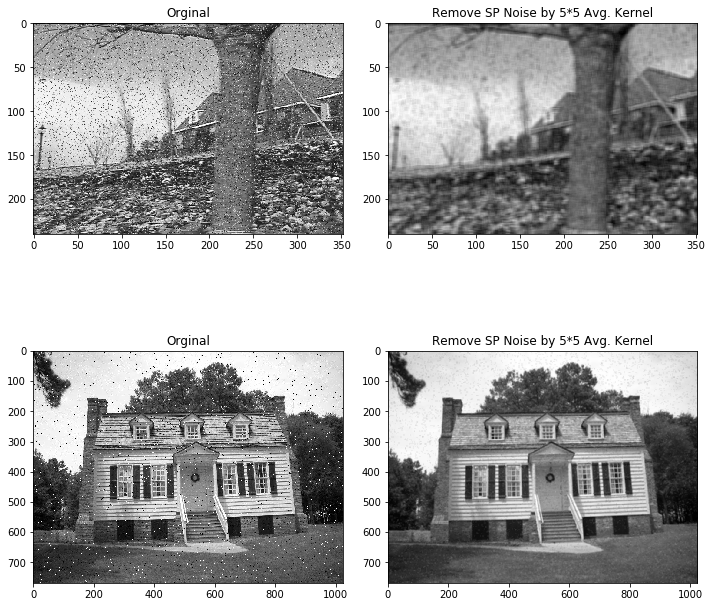

In [19]:
fig, ax=plt.subplots(2, 2, figsize = (10,10))

ax[0,0].imshow(noisy_img1_gray, cmap = 'gray')
ax[0,0].set_title('Orginal')

ax[0,1].imshow(sp_remove_noisyimage1, cmap = 'gray')
ax[0,1].set_title('Remove SP Noise by 5*5 Avg. Kernel')

ax[1,0].imshow(noisy_img2_gray, cmap = 'gray')
ax[1,0].set_title('Orginal')

ax[1,1].imshow(sp_remove_noisyimage2, cmap = 'gray')
ax[1,1].set_title('Remove SP Noise by 5*5 Avg. Kernel')

plt.tight_layout()
plt.show()
#plt.savefig("remove_sp_noisy.jpg")


In [20]:
# Define Median Filter 
def median_filter(image, filter_size):
    temp = []
    indexer = filter_size // 2
    image_final = []
    image_final = np.zeros((len(image),len(image[0])))
    for i in range(len(image)):

        for j in range(len(image[0])):

            for z in range(filter_size):
                if i + z - indexer < 0 or i + z - indexer > len(image) - 1:
                    for c in range(filter_size):
                        temp.append(0)
                else:
                    if j + z - indexer < 0 or j + indexer > len(image[0]) - 1:
                        temp.append(0)
                    else:
                        for k in range(filter_size):
                            temp.append(image[i + z - indexer][j + k - indexer])
            temp.sort()
            image_final[i][j] = temp[len(temp) // 2]
            temp = []
    return image_final

#sp_median = median_filter(noisy_img2_gray, 3)
#plt.figure(figsize = (12,12))
#plt.imshow(sp_median, cmap = 'gray')


In [21]:
# Revome Salt and Paper Noise of Noisyimage1 by 3*3 Median Filter
sp_remove_noisyimage1_mf = median_filter(noisy_img1_gray, 3)
#plt.imshow(sp_remove_noisyimage1_mf, cmap = 'gray')
#plt.title('Remove salt and paper noise')

# Revome Salt and Paper Noise of Noisyimage1 by 3*3 Median Filter
sp_remove_noisyimage2_mf = median_filter(noisy_img2_gray, 3)
#plt.imshow(sp_remove_noisyimage2_mf, cmap = 'gray')
#plt.title('Remove salt and paper noise')


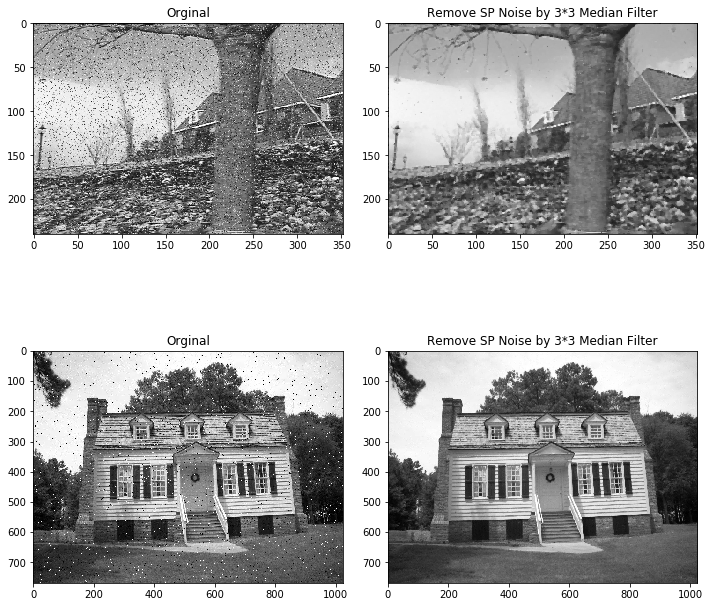

In [22]:
fig, ax=plt.subplots(2, 2, figsize = (10,10))

ax[0,0].imshow(noisy_img1_gray, cmap = 'gray')
ax[0,0].set_title('Orginal')

ax[0,1].imshow(sp_remove_noisyimage1_mf, cmap = 'gray')
ax[0,1].set_title('Remove SP Noise by 3*3 Median Filter')

ax[1,0].imshow(noisy_img2_gray, cmap = 'gray')
ax[1,0].set_title('Orginal')

ax[1,1].imshow(sp_remove_noisyimage2_mf, cmap = 'gray')
ax[1,1].set_title('Remove SP Noise by 3*3 Median Filter')

plt.tight_layout()
plt.show()
#plt.savefig("remove_sp_noisy_mf.jpg")

#### <b>Q3. Compute gradient magnitude for attached image ‘Q3_Image’; use your own function.</b>

<ol type="i">
  <li>Stretch the resulting magnitude (between 0 to 255) for better visualization</li>
  <li>Compute and show the histogram of gradient magnitude</li>
  <li>Compute gradient orientation </li>
   <li>Compute and show histogram of gradient orientation (angle between 0 and 2*pi)</li>
</ol>

Different types of method for solving image gardient such as Sobel, Laplacian , Prewitt , Roberts, Scharr,  Canny etc. I used laplacian for detecting image gardient. 
Laplacian is a second order derivative mask.It has positive and negative mask. 
The Laplacian operator is defined by:
\begin{align}
Laplace(f) = \dfrac{\partial^{2} f}{\partial x^{2}} + \dfrac{\partial^{2} f}{\partial y^{2}} 
\end{align}

\begin{align}
I_x & = I*G_x \\
I_y & = I*G_y 
\end{align}
Where $G_x$ is horizontal and $G_y$ vertical filters
$$
Positive Laplacian  = \begin{bmatrix}
0 & 1 & 0 \\
1 & -4 & 1 \\
0 & 1 & 0 
\end{bmatrix}
\quad
G_x  = \begin{bmatrix}
-1 & 0 & 1 \\
-2 & 0 & 2 \\
-1 & 0 & 1 
\end{bmatrix}
\quad
G_y  = \begin{bmatrix}
-1 & -2 & -1 \\
0 & 0 & 0 \\
1 & 2 & 1 
\end{bmatrix}
$$
<b>Absolute magnitude of the gradient
$$
|G| = \sqrt{G_x^2 + G_y^2} 
$$
<b>The angle of orientation</b>
$$
\theta = tan^{-1}({\frac{G_y^2}{G_x^2}})
$$

In [23]:
# Load Q_3 image 
Q3_img = cv2.imread('Q_3.jpg')

# Convert RGB to GRAY
Q3_img_gray = cv2.cvtColor(Q3_img, cv2.COLOR_BGR2GRAY)

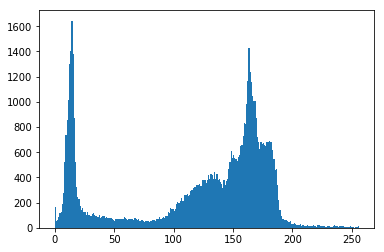

In [24]:
plt.hist(Q3_img_gray.ravel(),256,[0,256])
plt.show()

<b>
1. Stretch the resulting magnitude (between 0 to 255) for better visualization
</b>

In [25]:
# Laplacian positive kernel
l_p_k = [[0, 1, 0],
      [1, -4, 1],
      [0, 1, 0]]

# Laplacian negtive kernel
l_n_k = [[0, -1, 0],
      [-1, 4, -1],
      [0, -1, 0]]

# Sobel X-filters
gx = [[-1, 0, 1],
      [-2, 0, 2],
      [-1, 0, 1 ]]

# Sobel Y-filters
gy = [[-1, -2, -1],
      [0, 0, 0],
      [1, 2, 1 ]]

# Sobel x-derivative
gardient_x = ndimage.convolve(Q3_img_gray, gx)
#plt.imshow(x-derivative, cmap = 'gray')

# Sobel y-derivative 
gardient_y = ndimage.convolve(Q3_img_gray, gy)
#plt.imshow(y-derivative, cmap = 'gray')
Q3_img_gray = cv2.GaussianBlur(Q3_img_gray,(3,3),0)

# Laplacian edges 
Q3_img_conv_lp = ndimage.convolve(Q3_img_gray, l_p_k)
#plt.imshow(Q3_img_conv_lp, cmap = 'gray')
laplacian = cv2.Laplacian(Q3_img_gray,cv2.CV_64F)
#plt.imshow(Q3_img_conv_lp, cmap = 'gray')

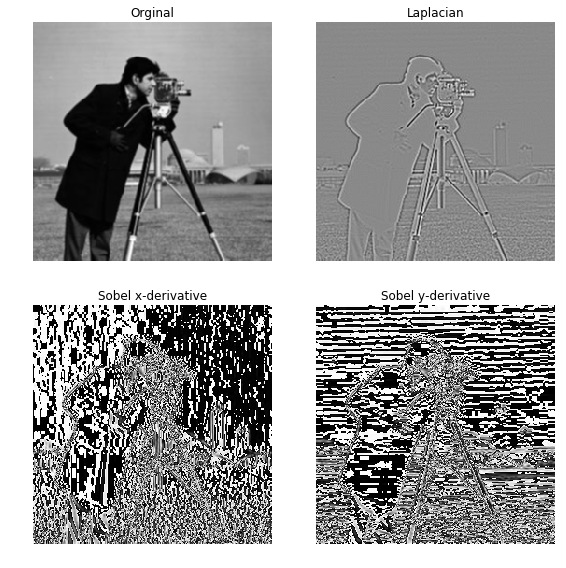

In [26]:
fig, ax=plt.subplots(2, 2, figsize = (8,8))

ax[0,0].imshow(Q3_img_gray, cmap = 'gray')
ax[0,0].set_title('Orginal')
ax[0,0].axis('off')

ax[0,1].imshow(laplacian, cmap = 'gray')
ax[0,1].set_title('Laplacian')
ax[0,1].axis('off')

ax[1,0].imshow(gardient_x, cmap = 'gray')
ax[1,0].set_title('Sobel x-derivative')
ax[1,0].axis('off')

ax[1,1].imshow(gardient_y, cmap = 'gray')
ax[1,1].set_title('Sobel y-derivative')
ax[1,1].axis('off')

plt.tight_layout()
plt.show()
#plt.savefig("laplacian.jpg")

<b>
2. Compute and show the histogram of gradient magnitude
</b>

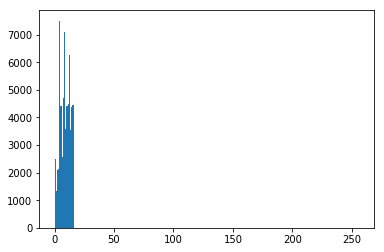

In [27]:
# Computer gradient magnitude
gradient_magnitude = np.sqrt((gardient_x*gardient_x) + (gardient_y*gardient_y))

# Histogram of gradient magnitude 
plt.hist(gradient_magnitude.ravel(),256,[0,256])
plt.show()

<b>
3. Compute gradient orientation
</b>

In [28]:
def gradient_orientation(thresh=(0, np.pi*2)):
    # Grayscale
    #gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    # Calculate the x and y gradients
    sobelx = gardient_x
    sobely = gardient_y
    # Take the absolute value of the gradient direction, 
    # apply a threshold, and create a binary image result
    # Here I'm suppressing annoying error messages
    with np.errstate(divide='ignore', invalid='ignore'):
        absgraddir = np.absolute(np.arctan(sobely/sobelx))
        binary_output =  np.zeros_like(absgraddir)
        binary_output[(absgraddir >= thresh[0]) & (absgraddir <= thresh[1])] = 1

    # Return the binary image
    return binary_output

<b>
4. Compute and show histogram of gradient orientation (angle between 0 and 2*pi)
</b>

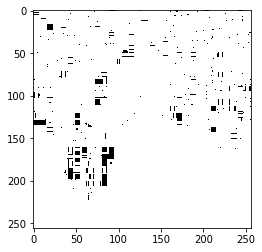

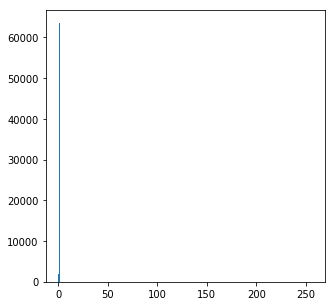

In [29]:
gradient_orientation = gradient_orientation()
plt.imshow(gradient_orientation , cmap = 'gray')
plt.figure(figsize = (5,5))
plt.hist(gradient_orientation.ravel(),256,[0,256])
plt.show()

#### <b>Q4. Load walk_1.jpg and walk_2.jpg images in openCV. Convert them to gray scale and subtract walk_2.jpg from walk_1.jpg. What is the result? Why?</b>

In [30]:
# Load Noisy walk_1 and walk_2 images 
walk_img1 = cv2.imread('walk_1.jpg')
walk_img2 = cv2.imread('walk_2.jpg') 

<b> There are several method for Converting RGB(Red, Green, Blue) to Grayscale(Black, White) image such as luminosity or Weight average, lightness or Desaturation, Simple averaging etc. </b> 

<b>Simple Averaging<b>  
<center>Gray =  (R + G + B) / 3 </center>

<b>Weighted method or luminosity method</b>
<center>Gray = ( (0.3 * R) + (0.59 * G) + (0.11 * B) ) </center>

 <b>Lightness or Desaturation</b>
<center>Gray = (max(R, G, B) + min(R, G, B)) / 2 </center>


<b> RGB to Gray Image Conversion Function</b>

In [31]:
# opencv read image B,G,R 
# RGB to Gray Image Conversion 
def rgb2gray(image):
    r, g, b = image[:,:,0], image[:,:,1], image[:,:,2] # split B , G, R pixels 
    gray = 0.2989 * r + 0.5870 * g + 0.1140 * b
    return gray
#gray = rgb2gray(walk_img1)
#plt.figure(figsize = (12,12))
#plt.imshow(gray, cmap = 'gray')

In [32]:
# walk_1 (RGB) to convert Gray 
walk_1_gray = rgb2gray(walk_img1)
#plt.figure(figsize = (12,12))
#plt.imshow(walk_1_gray, cmap = 'gray')

# walk_2 (RGB) to convert Gray 
walk_2_gray = rgb2gray(walk_img2)
#plt.figure(figsize = (12,12))
#plt.imshow(walk_1_gray, cmap = 'gray')


<b>Visualization of Walk_1 and walk_2 gray images</b>

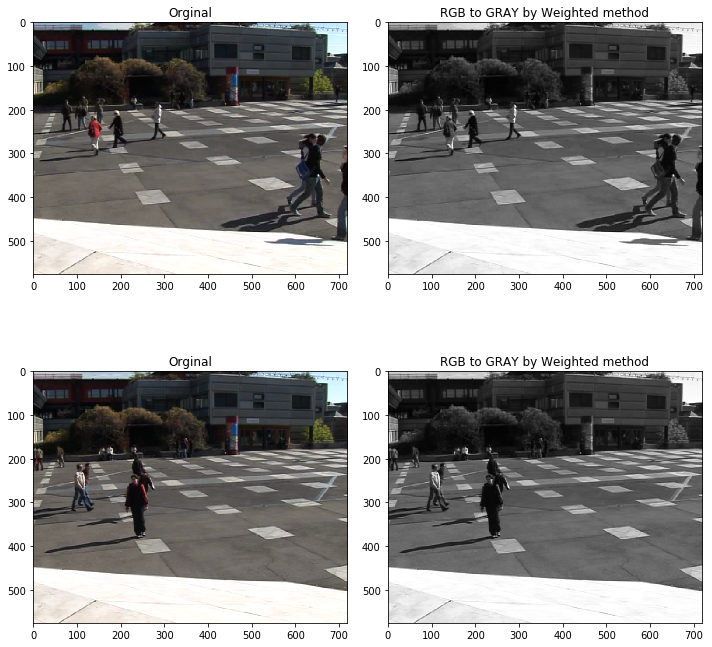

In [33]:
fig, ax=plt.subplots(2, 2, figsize = (10,10))

ax[0,0].imshow(cv2.cvtColor(walk_img1, cv2.COLOR_BGR2RGB)) 
ax[0,0].set_title('Orginal')

ax[0,1].imshow(walk_1_gray, cmap = 'gray')
ax[0,1].set_title('RGB to GRAY by Weighted method')

ax[1,0].imshow(cv2.cvtColor(walk_img2, cv2.COLOR_BGR2RGB))
ax[1,0].set_title('Orginal')

ax[1,1].imshow(walk_2_gray, cmap = 'gray')
ax[1,1].set_title('RGB to GRAY by Weighted method')

plt.tight_layout()
plt.show()
#plt.savefig("remove_sp_noisy_mf.jpg")

<b>Computing the difference between two images that shows the Structural disimilarity Index of two images. <br>
<i>Source:</i> Wang et al. in their 2004 paper, Image Quality Assessment: From Error Visibility to Structural Similarity.<br><br>
Image difference can be used for detecting how much the difference between two images. One appilication is identifying<i> phishing attack</i>.  
</b>

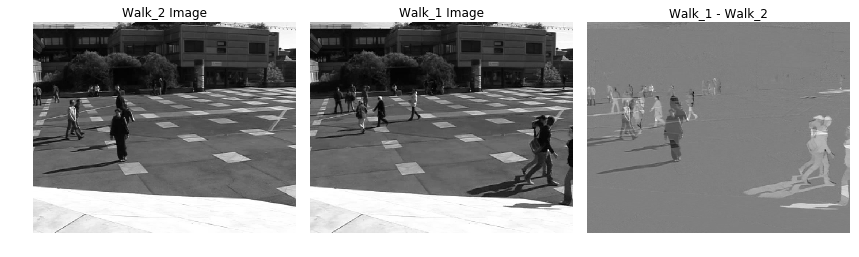

In [34]:
# Difference walk_2 from walk_1
subtract_image = walk_2_gray - walk_1_gray

# Visualization of Walk_1 and walk_2 Subtract Images 
fig, (ax1, ax2, ax3)=plt.subplots(1, 3, figsize = (12,12), sharey=True)

ax1.imshow(walk_2_gray, cmap = 'gray') 
ax1.set_title('Walk_2 Image')
ax1.axis('off')

ax2.imshow(walk_1_gray, cmap = 'gray')
ax2.set_title('Walk_1 Image')
ax2.axis('off')

ax3.imshow(subtract_image, cmap = 'gray')
ax3.set_title('Walk_1 - Walk_2')
ax3.axis('off')

plt.tight_layout()
plt.show()
#plt.savefig("remove_sp_noisy_mf.jpg")

#plt.imshow(subtract_image, cmap = 'gray')